In [2]:
from pylab import *
from PIL import Image
import numpy as np
import os, shutil

# 余弦相似性函数

In [3]:
# 余弦相似性
def cos_like(x, y):
    tx = np.array(x)
    ty = np.array(y)
    dom = np.dot(tx, ty)
    d_x = linalg.norm(tx)
    d_y = linalg.norm(ty)
    return dom/(float(d_x*d_y))


# 修改图片尺寸函数

def ResizeImage(filein, fileout=False, width=240, height=360, type='jpg'):
    img = Image.open(filein)
    out = img.resize((width, height),Image.ANTIALIAS) #resize image with high-quality
    return out
    #out.save(fileout, type)
    
# 图像转数组

def img2arr(imgfile):
    # 修改尺寸
    img = ResizeImage(imgfile)
    img = img.crop((40, 60, 200, 300))
    # 灰度化
    img = img.convert('RGB')
    # 阀值过滤
    #img_filter = img_gray.point(lambda x:0 if x<143 else 255)
    # 转换为数组
    arr = np.array(img).astype('float')
    #arr = arr*[1, 0, 0, 1]
    # 最小最大规范化
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return arr

# 序列化
def pickle(arr):
    dim = arr.shape[2]
    if dim == 3:
        li = []
        for i in arr:
            li.extend(i)
        li2 = []
        for j in li:
            li2.extend(j)
        return li2
    if dim == 2:
        li = []
        for i in arr:
            li.extend(i)
        return li
    else:
        return None

# 归一化
sim = lambda x,y:np.round(0.5+0.5*cos_like(pickle(x), pickle(y)), 3)


# 图像识别

In [6]:
fold = '/sdcard/1/img'
base = img2arr('/sdcard/1/img_base/m4.jpg')
predict_list = []
for i in os.listdir(fold):
    target = img2arr(os.path.join(fold, i))
    coef = sim(base, target)
    predict_list.append((i, coef))
    
n = 0
result_sorted = sorted(predict_list, key=lambda x:x[1], reverse=True)
for i in result_sorted:
    # 如果相似度大于0.8则归类到一个文件夹里面
    if n < 5:
        newfold = '/sdcard/1/img_new'
        if not os.path.exists(newfold):
            os.makedirs(newfold)
        currentpath = os.path.join(fold, i[0])
        targetpath = os.path.join(newfold, i[0])
        # 复制到心文件夹
        # shutil.copyfile(currentpath, targetpath)
        # 移动到新文件夹
        shutil.copyfile(currentpath, targetpath)
    n += 1
    print(i[1], i[0])


1.0 IMG20181007193606.jpg
0.975 IMG20181014185628.jpg
0.97 IMG20181014185645.jpg
0.97 IMG20181014185649.jpg
0.964 IMG20181014185647.jpg
0.963 IMG20181012131557.jpg
0.963 IMG20181007193603.jpg
0.962 IMG20181014185635.jpg
0.961 IMG20181014185616.jpg
0.96 Screenshot_2018-10-09-03-06-19-19.png
0.959 IMG20181011151137.jpg
0.958 IMG20181011193109.jpg
0.957 IMG20181011193142.jpg
0.957 IMG20181011151227.jpg
0.956 IMG20181011193119.jpg
0.956 formula.jpg
0.956 Screenshot_2018-10-09-21-32-08-83.png
0.956 IMG20181011132303.jpg
0.955 IMG20181011201447.jpg
0.955 IMG20181011193039.jpg
0.954 IMG20181011201512.jpg
0.952 IMG20181011193134.jpg
0.952 IMG20181011193020.jpg
0.952 Screenshot_2018-10-09-21-37-58-88.png
0.95 IMG20181011151302.jpg
0.948 IMG20181011193146.jpg
0.947 dogSH.jpg
0.947 IMG20181011151126.jpg
0.945 IMG20181012131511.jpg
0.942 IMG20181011132250.jpg
0.938 IMG20181006103832.jpg
0.937 IMG20181012131517.jpg
0.934 dogHD.jpg
0.933 78e1e84ff6f4d2d17eae11838d1c587e.jpg
0.929 f10.jpg
0.926 IMG20

In [5]:
len(predict_list)

75

In [27]:
s = img2arr('/sdcard/1/img_base/m2.jpg')
s1 = img2arr(os.path.join(fold, 'IMG20181014185649.jpg'))
sim(s, s1)

0.90200000000000002

In [28]:
cos_like(pickle(s), pickle(s1))

0.80365852946871197

In [26]:
a = img2arr(fold+'/dog.jpg')
a.shape

(240, 160, 3)

In [ ]:
m = base.shape[2]
m

In [ ]:
li = []
for i in a:
    li.extend(i)
li2 = []
for j in li:
    li2.extend(j)
    

In [ ]:
type(li2)
type(li3)
cos_like(li2, li3)
sim(li3, li2)

# 图像尺寸剪切

In [ ]:
#im = Image.open(os.path.join(fold, 'base.jpg'))
im = ResizeImage(os.path.join(fold, 'base.jpg'))
w,h = im.size
print(w, h)
im = im.crop((w//6, h//6, w-(w//6), h-(h//6)))
im

In [ ]:
newfold

In [ ]:
shutil.copyfile(fold+'me.jpg', os.path.join(newfold, 'me.jpg'))

In [ ]:
for i in os.listdir(fold):
    im = ResizeImage(os.path.join(fold, i))
    img = Image.open(im)
    print(im.size)
    break

In [ ]:
li = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
len(li)

2.54

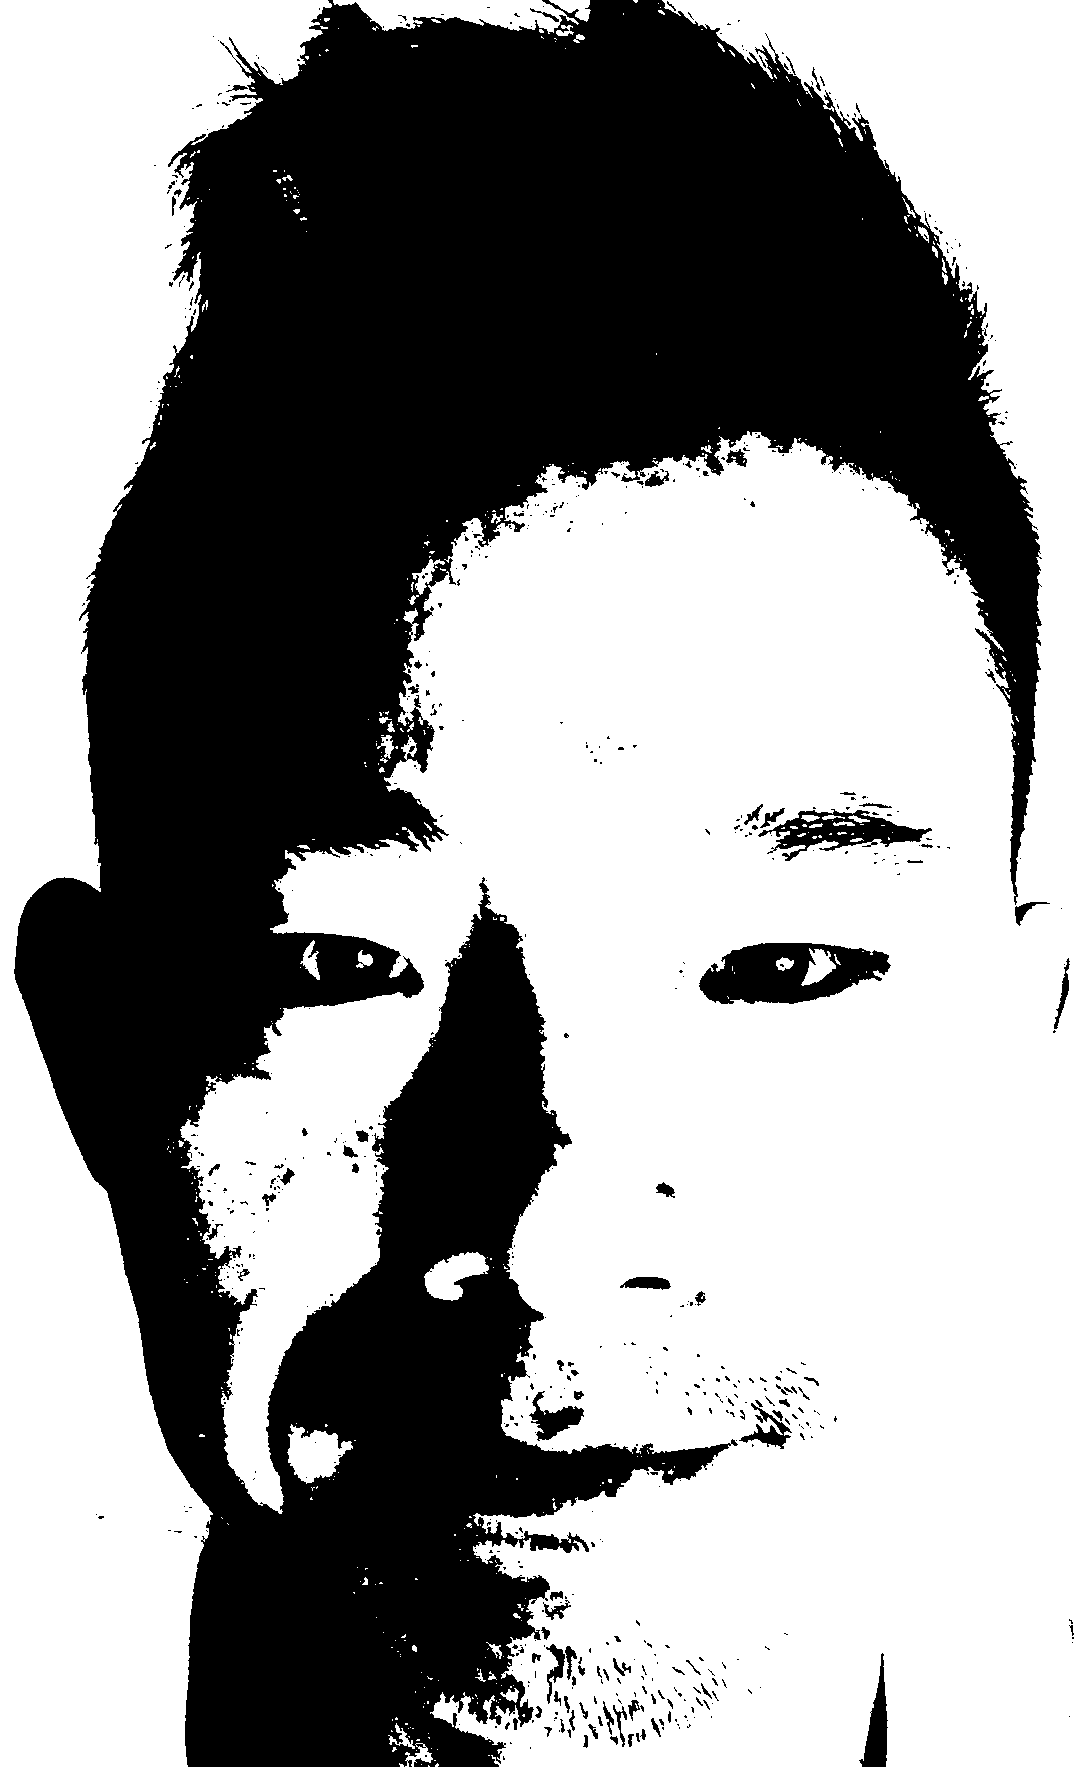

In [192]:
im = Image.open('/sdcard/1/img/m11.jpg').convert('L')
im.size
#out = im.resize((200, 300))
arr = np.array(im)
im.point(lambda x:0 if x<143 else 255)

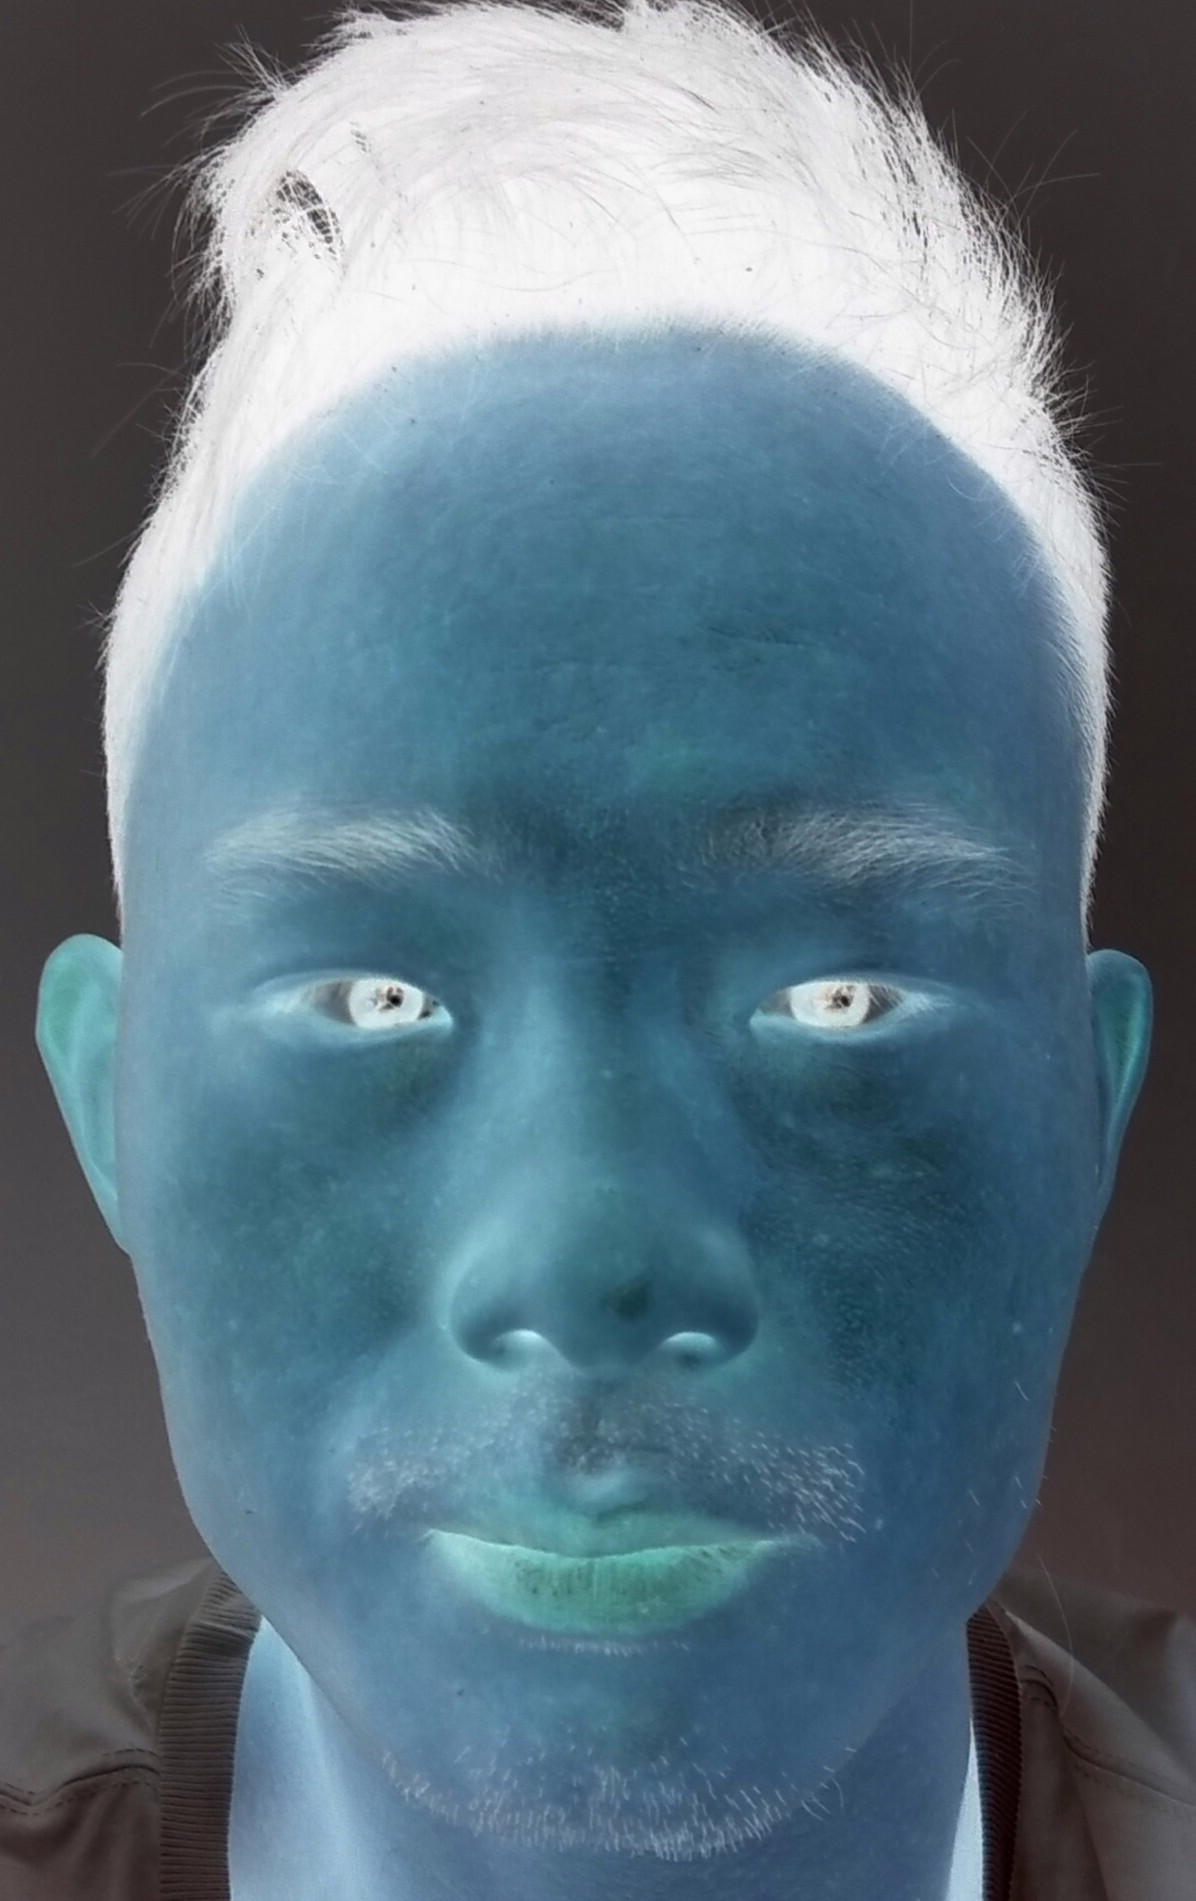

In [184]:
Image.fromarray(arr.astype('uint8'))

In [96]:
arr = np.array(out)
(arr-arr.min())/(arr.max()-arr.min())

array([[[ 0.0627451 ,  0.11372549,  0.0745098 ],
        [ 0.0627451 ,  0.11372549,  0.0745098 ],
        [ 0.0627451 ,  0.10980392,  0.07058824],
        ..., 
        [ 0.36078431,  0.32941176,  0.38039216],
        [ 0.35686274,  0.3254902 ,  0.37647059],
        [ 0.35686274,  0.3254902 ,  0.37647059]],

       [[ 0.07843137,  0.11372549,  0.10196078],
        [ 0.0745098 ,  0.10980392,  0.09803922],
        [ 0.0745098 ,  0.09803922,  0.09019608],
        ..., 
        [ 0.34509804,  0.31372549,  0.36470588],
        [ 0.34509804,  0.31372549,  0.36470588],
        [ 0.34509804,  0.31372549,  0.36470588]],

       [[ 0.06666667,  0.09803922,  0.10980392],
        [ 0.0627451 ,  0.09411765,  0.10588235],
        [ 0.05490196,  0.0745098 ,  0.09019608],
        ..., 
        [ 0.34117647,  0.31764706,  0.37254902],
        [ 0.34509804,  0.31372549,  0.37254902],
        [ 0.34509804,  0.31372549,  0.37254902]],

       ..., 
       [[ 0.67058824,  0.55686274,  0.43921569],
        

In [ ]:
np.